# 2.1 Multivariate normal distribution

---
> Erick Eduardo Aguilar Hernández:
> * mat.ErickAguilar@ciencias.unam.mx
> * isc.ErickAguilar@gmail.com

---

We denote that the random vector $\textbf{x}$ distributes multivariate normal with parameters $\mu \in \mathbb{R}^p$ and semipositive definite $\Sigma \in \mathbb{R}^p \times \mathbb{R}^p$ as:
$$
\textbf{x} \sim N_p\left(\mu , \Sigma \right) 
$$

If $\textbf{x}$ has distributions given by:

$$
f_{X_1,...,X_p}(x_1,...,x_p) = \frac{\left| \Sigma \right|^{-\frac{1}{2}}}{\left[\sqrt{2 \pi}\right]^p} exp\left( -\frac{1}{2} \left[\textbf{x}-\mu \right]' \Sigma^{-1} \left[\textbf{x} - \mu \right] \right)
$$

This multivariate distribution it's called the **multivariate normal distribution**. Note that the density function of the random vector is completely defined by the parameters $\mu$ and $\Sigma$, where $\Sigma$ should be symmetric with non determinant zero. 

When $\mu=\textbf{0}$ and $\Sigma=\textbf{I}$ then it is said that $\mathbf{x}$ distributes as a normal multivariate standard.

The argument $\left[\textbf{x}-\mu \right]' \Sigma^{-1} \left[\textbf{x} - \mu \right]$ it's a squared weighted distance, where $\Sigma = \mathbf{I}$ then $\left[\textbf{x}-\mu \right]' \Sigma^{-1} \left[\textbf{x} - \mu \right] = \left|\left|\mathbf{x}-\mu\right|\right|^2$.

#### Properties

If $\mathbf{x} \in \mathbb{R}^p, \mathbf{x} \sim N\left(\mu , \Sigma \right)$ and
1. $\mathbf{A} \in \mathbb{R}^q \times \mathbb{R}^p$ matrix of constants then $\mathbf{A_{q \times p} x_{p \times 1}} \sim \mathbf{N_q( A \mu, A \Sigma A')}$.
1. $\mathbf{\Sigma=\Sigma^{1/2} \Sigma^{1/2}}$ where $\Sigma^{1/2}\Sigma^{1/2}$ is the decomposition in **Cholesky factorization** of $\mathbf{\Sigma}$ then $\mathbf{z}=\mathbf{\left( x -\mu \right)\Sigma^{-1/2}}\sim N_p\left(\mathbf{0}, \mathbf{I} \right)$

#### Bivariated normal distribution
___

We call the above joint distribution for the vector $\textbf{x}=(X_1,X_2)$ the bivariated normal distribution when:


$$
\begin{align*}
f_{X_1,X_2}(x_1,x_2) & = \frac{1}{2 \pi (1-\rho^2)} exp\left( -
\frac{1}{2 (1-\rho^2)}
\left[ \left(\frac{x_1-\mu_1}{\sigma_{1}}\right)^2+
\left(\frac{x_2-\mu_2}{\sigma_{2}}\right)^2-
2\rho \frac{(x_1-\mu_1)(x_2-\mu_2)}{\sigma_1 \sigma_2}
\right]
\right)\\
\end{align*}
$$

**Example 2.1 - 1 [Visualizing the bivariated normal distribution density]**

$$
f_{X_1,X_2}(x_1,x_2), 
(X_1,X_2) \sim N\left(
\mu=\left[ \begin{array}{ccccc}
0 \\
0 \end{array} \right]
,
\Sigma=\left[ \begin{array}{ccccc}
2 & 1\\
1 & 2 \end{array} \right]
\right) 
$$

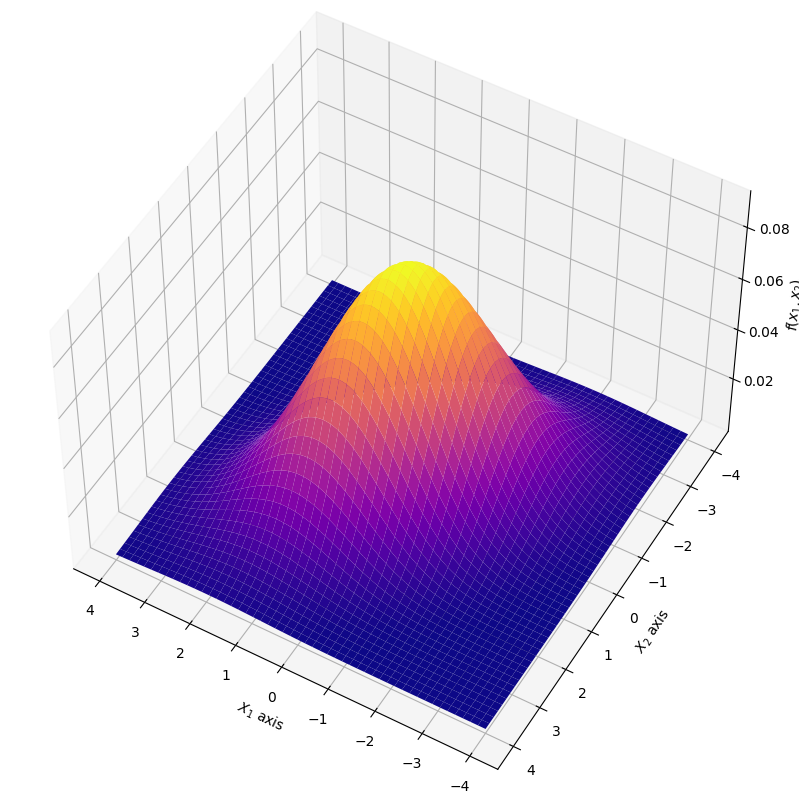

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 


mu=[0,0]
sigma = [[2,1],[1,2]]

plt.rcParams['axes.facecolor'] = 'white'

y = np.linspace(-4,4,500)
x = np.linspace(-4,4,500)

X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; 
pos[:, :, 1] = Y

normal_rv = multivariate_normal(mu,sigma)

fig = plt.figure(figsize=(20,10))
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, normal_rv.pdf(pos),cmap='plasma',linewidth=0)
ax.set_xlabel('$X_1$ axis')
ax.set_ylabel('$X_2$ axis')
ax.set_zlabel('$f(x_1,x_2)$')
ax.view_init(50,120)
plt.show()

# Spectral decomposition
___


In [2]:
import numpy as np

S = np.matrix([[2,1],[1,2]])
Gamma = np.matrix([[1/np.sqrt(2),-1/np.sqrt(2)],[1/np.sqrt(2),1/np.sqrt(2)]])
Lambda = np.matrix([[3,0],[0,1]])
GammaInv = Gamma.transpose() 

print('Matrix S\n',S)
print('Matrix Gamma\n',Gamma)
print('Matrix Lambda\n',Lambda)
print('Matrix GammaInv\n',GammaInv)
print('Gamma*Lambda*GammaInv \n',np.dot(Gamma,np.dot(Lambda,Gamma.transpose())))

Matrix S
 [[2 1]
 [1 2]]
Matrix Gamma
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Matrix Lambda
 [[3 0]
 [0 1]]
Matrix GammaInv
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Gamma*Lambda*GammaInv 
 [[2. 1.]
 [1. 2.]]


###  Constant probability density contours and confidence hyper-ellipses.
___

**Bivariate normal distribution constant probability density contour and confidence ellipse**

![confidence ellipse](static/confidenceEllipse.png)

**Example** [Estimating the bivariated normal distribution parameters and vizualizing constants probability density contours for two characteristics of three distinct plant populations]

**step 1:**  Loading iris data set

In [3]:
import pandas as pd

irisPath = 'DataSets/Iris.csv'
iris_df = pd.read_csv(irisPath)
iris_setosa_df = iris_df[iris_df['Species']=='Iris-setosa']
iris_versicolor_df= iris_df[iris_df['Species']=='Iris-versicolor']
iris_virginica_df = iris_df[iris_df['Species']=='Iris-virginica']
display(iris_setosa_df[:5])
display(iris_versicolor_df[:5])
display(iris_virginica_df[:5])

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


**steep 2** Coding functions to perform the constants probability density contours analysis

* **computeMaximumLikelihoodEstimators**: Compute the sample mean vector $\mathbf{\bar{x}}$ and sample covariance matrix $\mathbf{S}$ since these statistics are the maximum likelihood estimators of the parameters of normal multivariate istribution.

* **diagonalize**: Performs the spectral decomposition of the sample covariance matrix, due to the fact of the spectral decomposition it's a function of $\mathbf{\Sigma}$ by the invariance theorem the eigenvalues and eigenvectors geting from decompose the sample covariance matrix will be the estimators of the poblational eigenvectors and eigenvalues.

* **plotConfidenceEllipse**: Once the chi squared critical value is given, it's time to plot the constant probability density contour in direction of the eigenvectors with length eigenvalue times chi squared critical value

* **getProbabilityDensityContour**: Puts in order the last function and perform the analysis.

In [4]:
sigma = np.matrix([[2,1],[1,2]])
eigenValues, eigenVectors = np.linalg.eigh(sigma)
idx = eigenValues.argsort()[::-1]
#eigenValues[idx]
#eigenVectors[idx]
idx

array([1, 0], dtype=int64)

In [5]:
from matplotlib.patches import Ellipse
from scipy.stats import chi2

def computeMaximumLikelihoodEstimators(dataset_df,columns):
    mu = list(dataset_df[columns].mean())
    sigma = np.matrix(dataset_df[columns].cov())
    return mu, sigma

def diagonalize(sigma):
    eigenValues, eigenVectors = np.linalg.eigh(sigma)
    idx = eigenValues.argsort()[::-1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenValues, eigenVectors

def plotConfidenceEllipse(plt,mu,eigenValues,eigenVectors,chiSquaredCriticalVale,ax=None,**kwargs):
    if ax is None:
        ax = plt.gca()
    theta = np.degrees(np.arctan2(*eigenVectors[:,0][::-1]))
    width,height = chiSquaredCriticalVale*np.sqrt(eigenValues)
    confidenceEllipse = Ellipse(xy=mu,width=width,height=height,angle=theta,**kwargs)
    ax.add_artist(confidenceEllipse)
    return confidenceEllipse

def getProbabilityDensityContour(plt,dataset_df,columns,alpha,freedomDegrees,color,name='DataSet'):
    mu, sigma = computeMaximumLikelihoodEstimators(dataset_df,columns)
    eigenValues, eigenVectors = diagonalize(sigma)
    chiSquaredCriticalVale = chi2.ppf(q=(1-alpha),df=freedomDegrees)
    plotConfidenceEllipse(plt,mu,eigenValues,eigenVectors,chiSquaredCriticalVale,color=color,alpha=0.1)
    sumaryTable=[]
    sumaryTable.append(['Mean',mu])
    sumaryTable.append(['Covariance matrix',sigma])
    sumaryTable.append(['EigenValues',eigenValues])
    sumaryTable.append(['EigenVectors',eigenVectors])
    sumaryTable.append(['Confidence',1-alpha])
    sumaryTable.append(['Chi-squared critical value',chiSquaredCriticalVale])
    sumaryTableDF = pd.DataFrame(sumaryTable,columns=['Summary',name])
    return sumaryTableDF

def scatterPlot(plt,dataset_df,col_1,col_2,color):
    dataset_df = dataset_df[[col_1,col_2]]
    plt.scatter(dataset_df[col_1],dataset_df[col_2],color=color)

**steep 3** Selecting two characteristics of three different plants populations and performing the constant probability density contour analysis

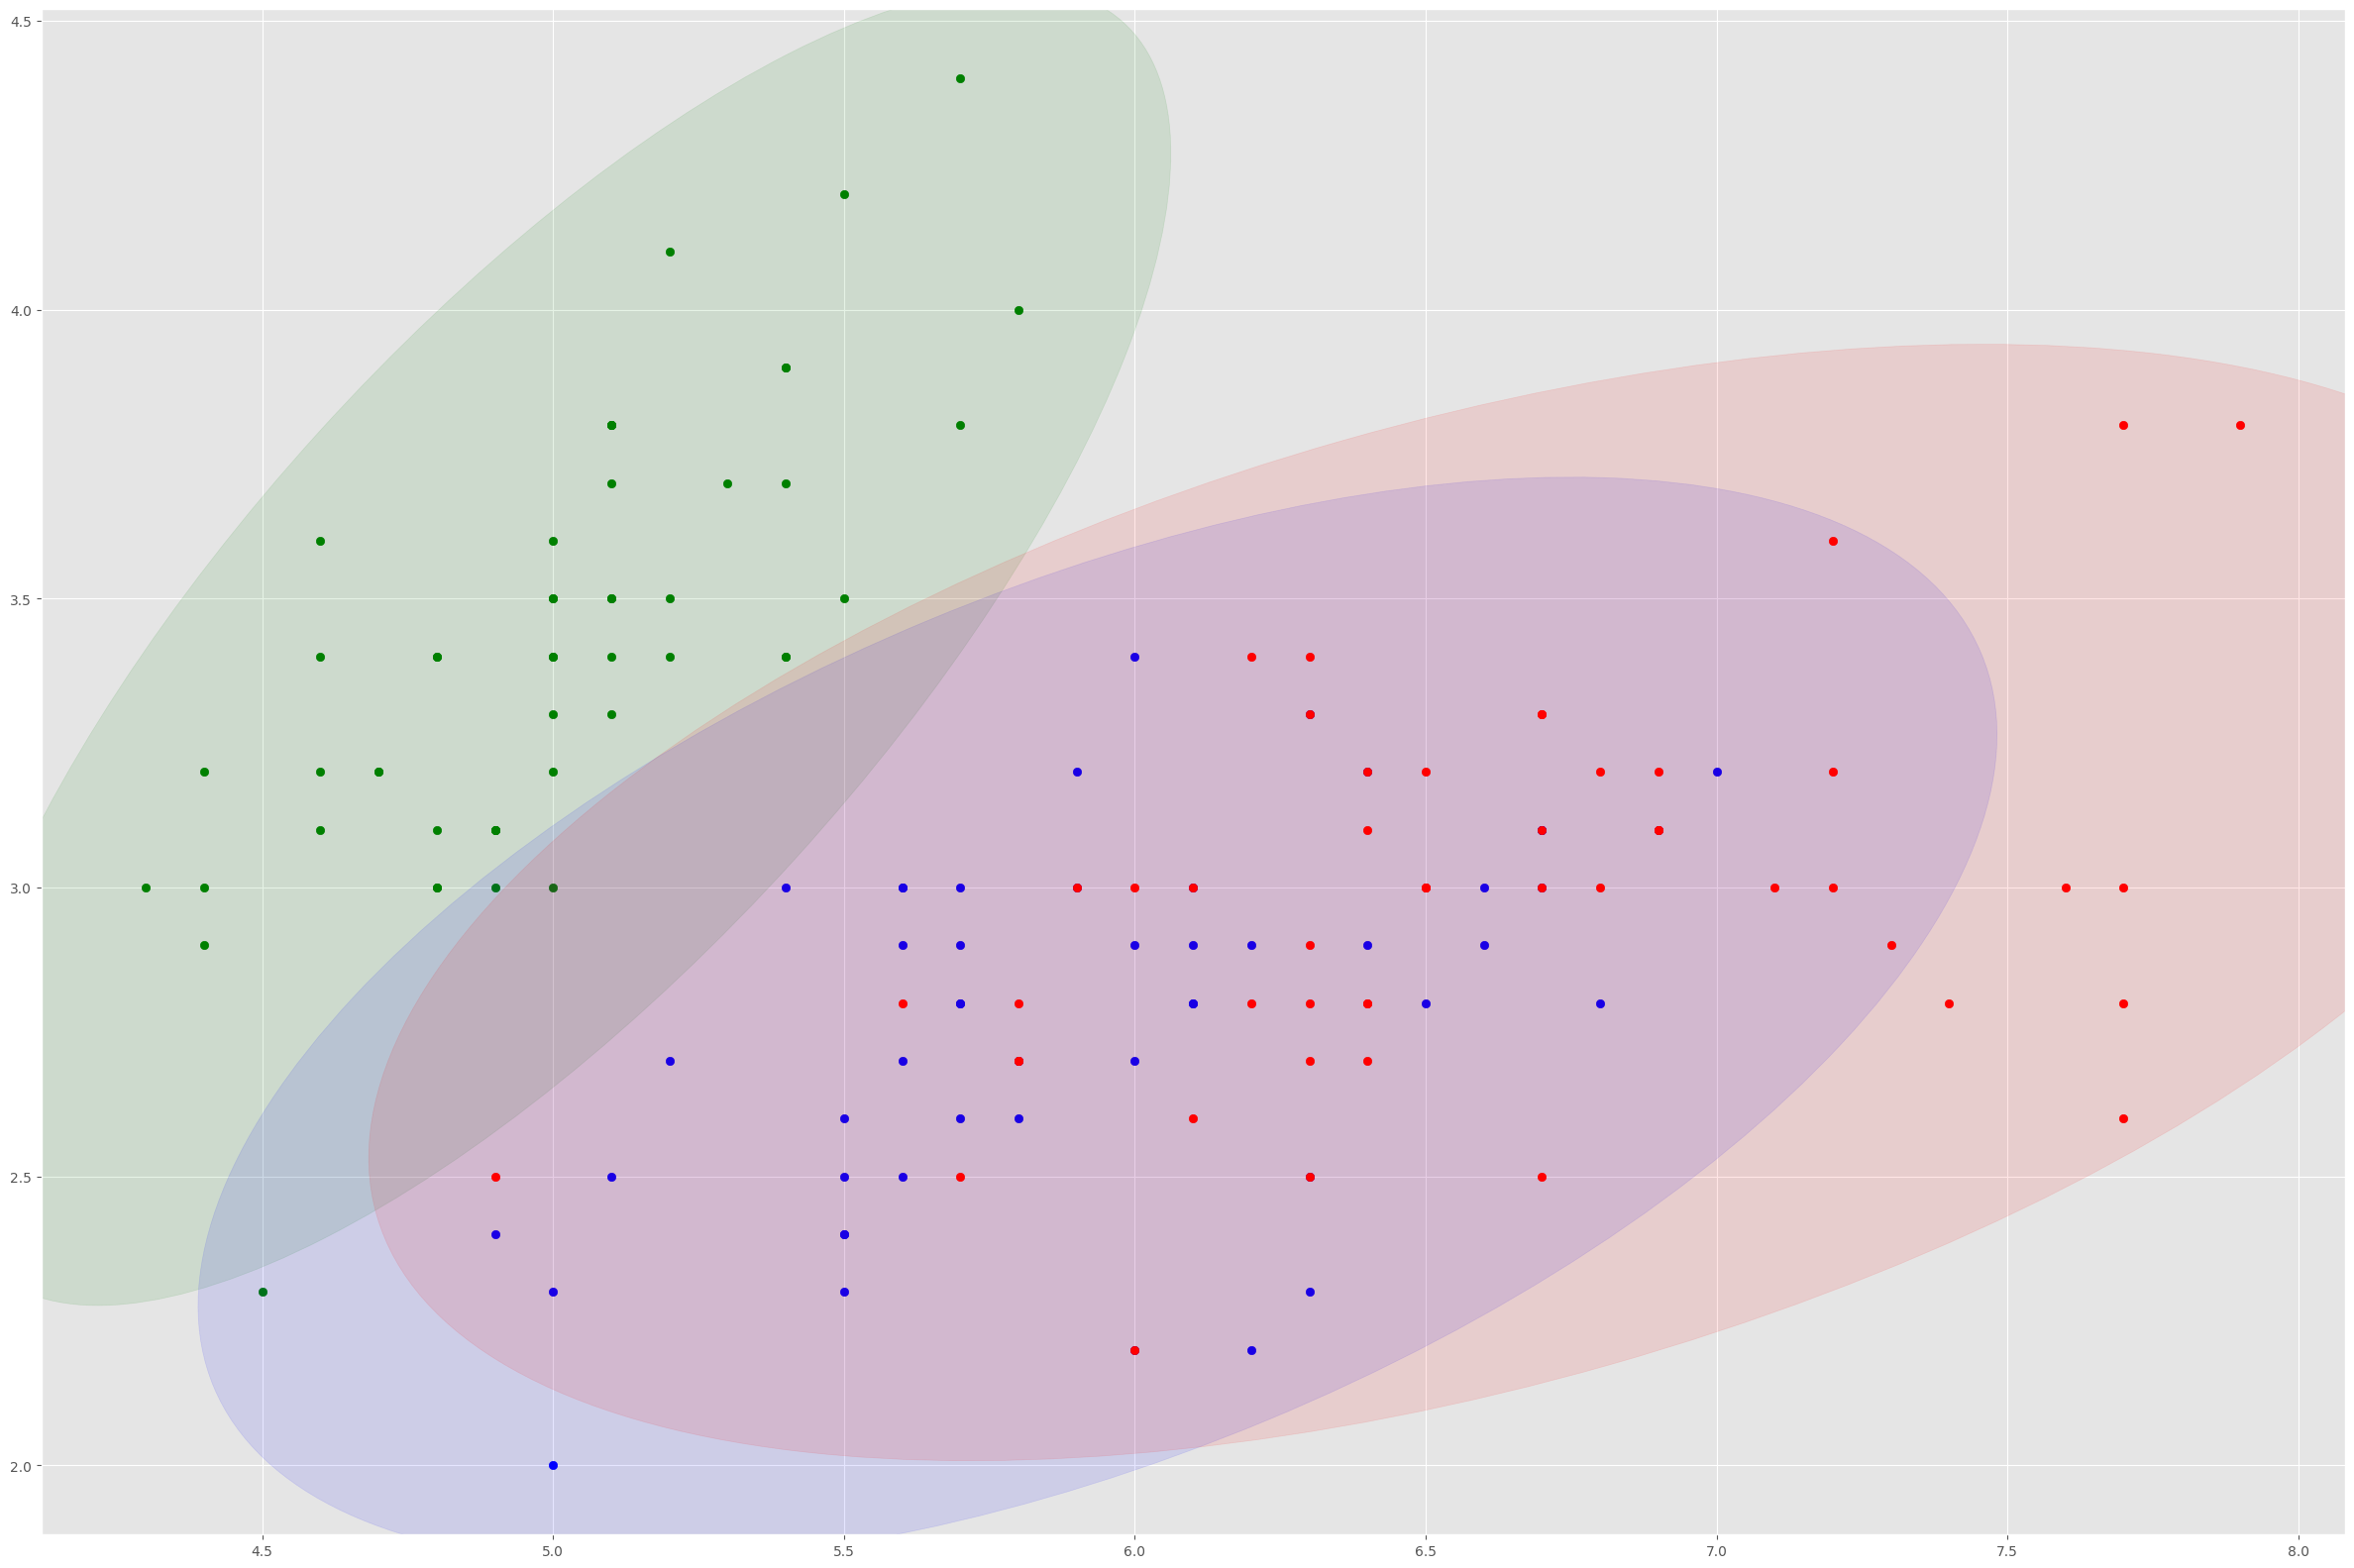

,Summary,Iris-setosa
0,Mean,"[5.006, 3.418]"
1,Covariance matrix,"[[[[[0.12424898 0.10029796]]]], [[[[0.10029796..."
2,EigenValues,"[0.23555675320019365, 0.033871818228377856]"
3,EigenVectors,"[[[[[ 0.66941065 -0.74289258]]]], [[[[0.742892..."
4,Confidence,0.95
5,Chi-squared critical value,5.991465


,Summary,Iris-versicolor
0,Mean,"[5.936, 2.7700000000000005]"
1,Covariance matrix,"[[[[[0.26643265 0.08518367]]]], [[[[0.08518367..."
2,EigenValues,"[0.30207197529823676, 0.06283006551808983]"
3,EigenVectors,"[[[[[-0.92251411 0.38596337]]]], [[[[-0.38596..."
4,Confidence,0.95
5,Chi-squared critical value,5.991465


,Summary,Iris-virginica
0,Mean,"[6.587999999999998, 2.974]"
1,Covariance matrix,"[[[[[0.40434286 0.09376327]]]], [[[[0.09376327..."
2,EigenValues,"[0.43121130415650855, 0.0771356346190015]"
3,EigenVectors,"[[[[[-0.96130986 0.27546932]]]], [[[[-0.27546..."
4,Confidence,0.95
5,Chi-squared critical value,5.991465


In [6]:
plt.style.use('ggplot')
col_1,col_2='SepalLengthCm', 'SepalWidthCm'
#col_1,col_2='PetalLengthCm', 'SepalWidthCm'
#col_1,col_2='PetalLengthCm', 'PetalWidthCm'
cols=[col_1,col_2]
alpha=0.05
df=2
plt.figure(figsize=(30,20))

scatterPlot(plt,iris_setosa_df,col_1,col_2,'Green')
summary_setosa_df = getProbabilityDensityContour(plt,iris_setosa_df,[col_1,col_2],alpha,df,\
                                             color='Green',name='Iris-setosa')

scatterPlot(plt,iris_versicolor_df,col_1,col_2,'Blue')
summary_versicolor_df = getProbabilityDensityContour(plt,iris_versicolor_df,[col_1,col_2],alpha,df,\
                                             color='Blue',name='Iris-versicolor')

scatterPlot(plt,iris_virginica_df,col_1,col_2,'Red')
summary_virginica_df = getProbabilityDensityContour(plt,iris_virginica_df,[col_1,col_2],alpha,df,\
                                             color='Red',name='Iris-virginica')

plt.show()
display(summary_setosa_df)
display(summary_versicolor_df)
display(summary_virginica_df)

**Note:**
    
During the previous analysis, the assumption was made that the characteristics had a normal multivariate distribution based only on the appearance of the data, however, there was never any test to verify this assumption. How can one know if the data follow a multivariate normal distribution?

# Simulating multivariate normal random vectors
___

**Example 2.1 - 3 
[Generating a sample of multivariate normal distribution for p dimensions]**

In [7]:
import numpy as np
def getMvNormalSample(mu,sigma,n):
    columns = ['x'+str(i+1) for i in range(0,len(mu))]
    return pd.DataFrame(np.random.multivariate_normal(mu,sigma,n),columns=columns)

**step 2**: Generating a sample of size n of the multivariate bivariated normal distribution:

$$
(X_1,X_2) \sim N\left(
\mu=\left[ \begin{array}{ccccc}
0 \\
0 \end{array} \right]
,
\Sigma=\left[ \begin{array}{ccccc}
2 & 1\\
1 & 2 \end{array} \right]
\right) 
$$

In [8]:
n=500
mu=[0,0]
sigma = [[2,1],[1,2]]
alpha_0=0.01
degreesFreedom=len(mu)
mvd_normal_sample_df = getMvNormalSample(mu,sigma,n)
mvd_normal_sample_df

,x1,x2
0,-1.663756,0.477187
1,0.417625,-0.699497
2,1.908365,0.687891
3,-0.100884,-0.617035
4,0.340611,-2.533938
...,...,...
495,-1.728236,-0.434375
496,-1.520170,0.096161
497,1.211748,2.109887
498,0.686363,1.716494


**Step 3** Visualizing the sample and the constant density ellipse for differents leves of confidence $(1-\alpha)$%:

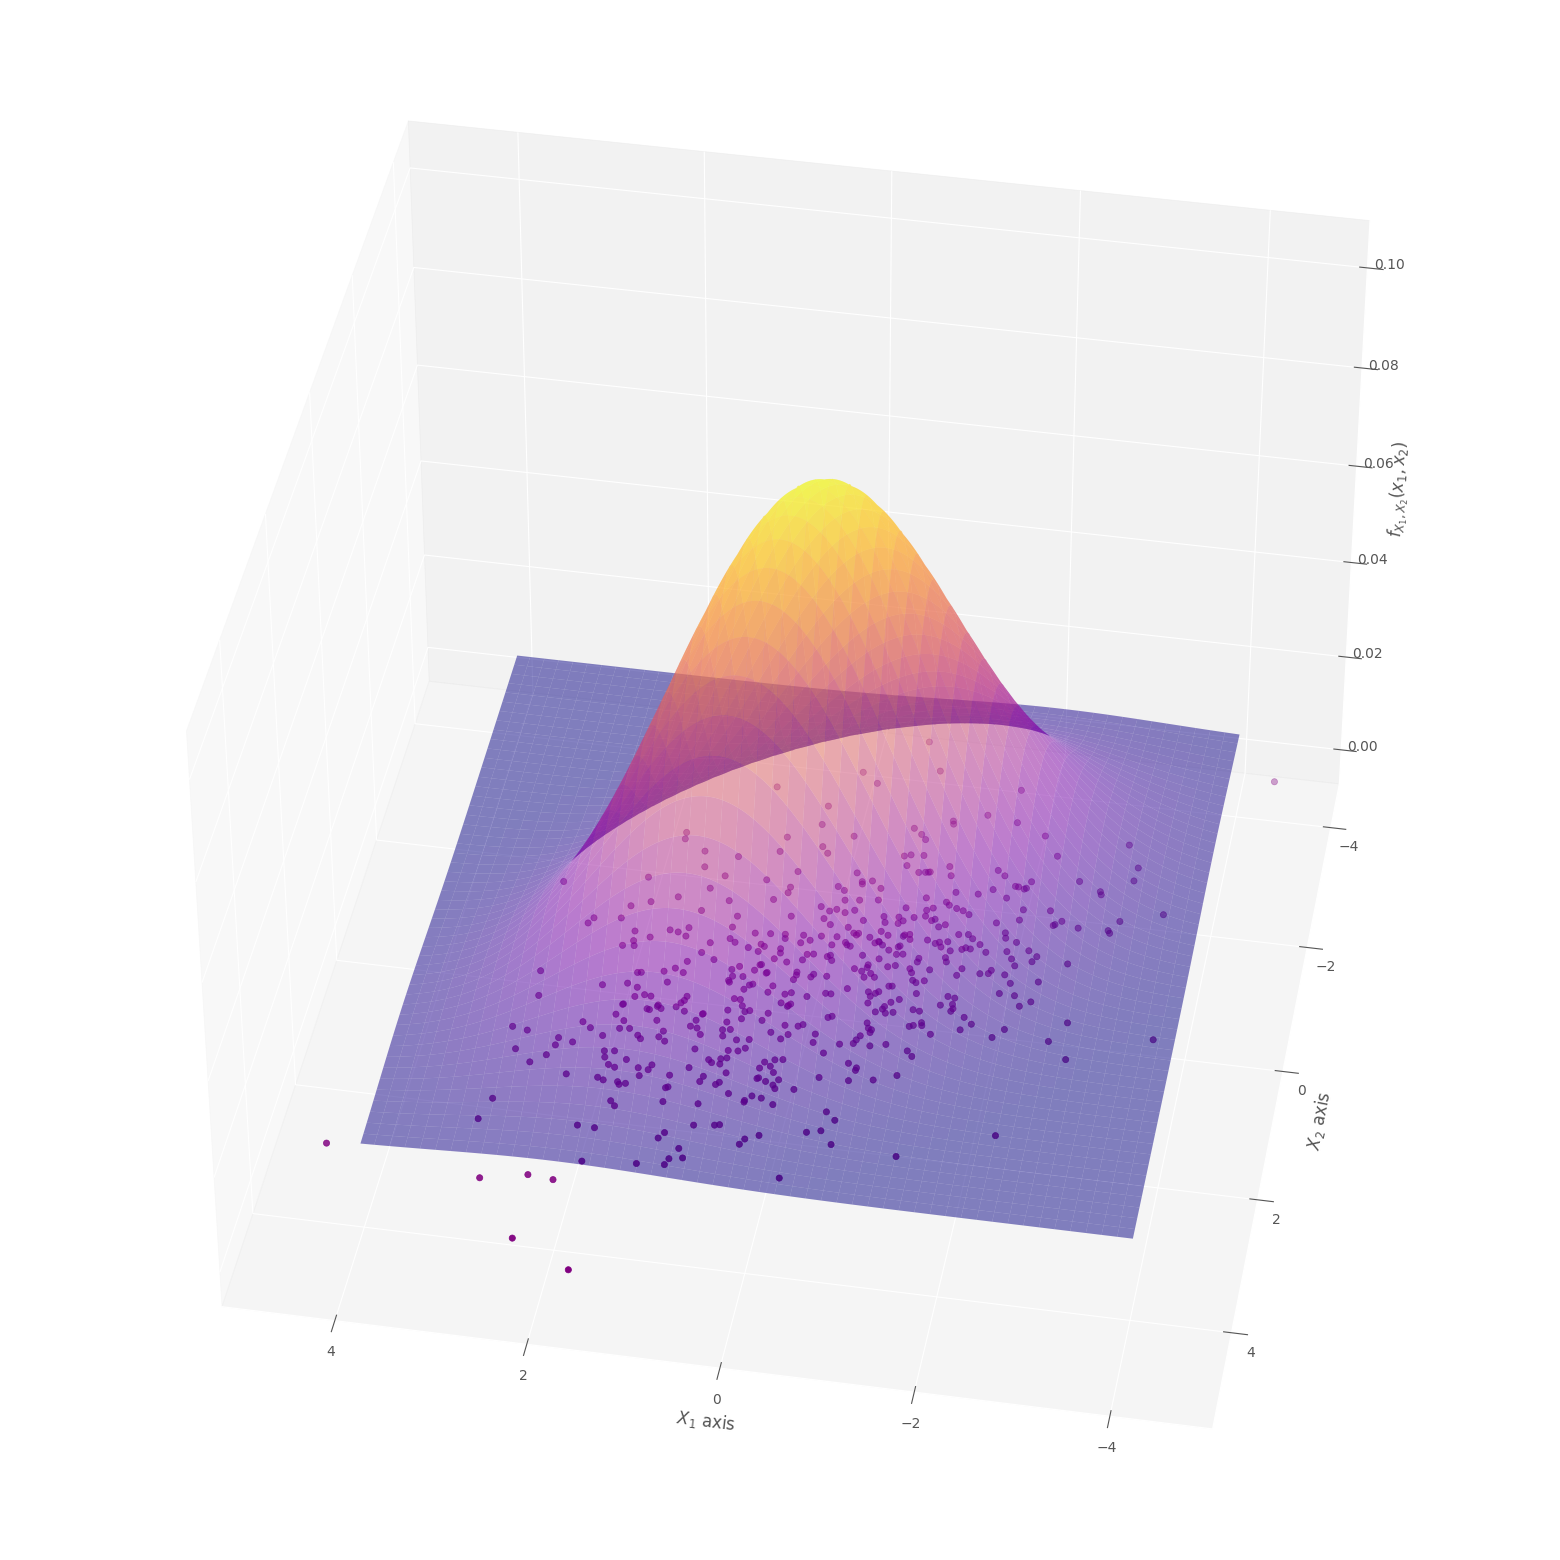

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

mu=[0,0]
sigma = [[2,1],[1,2]]

plt.rcParams['axes.facecolor'] = 'white'
y = np.linspace(-4,4,500)
x = np.linspace(-4,4,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal(mu,sigma)
fig = plt.figure(figsize=(20,20))
#ax = fig.gca()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mvd_normal_sample_df['x1'],mvd_normal_sample_df['x2'],[0]*len(mvd_normal_sample_df['x1']),color='purple')
ax.plot_surface(X, Y, 0.01+rv.pdf(pos),cmap='plasma',linewidth=0,alpha=0.5)
ax.set_xlabel('$X_1$ axis')
ax.set_ylabel('$X_2$ axis')
ax.set_zlabel('$f_{X_1,X_2}(x_1,x_2)$')
ax.view_init(40,100)
plt.show()

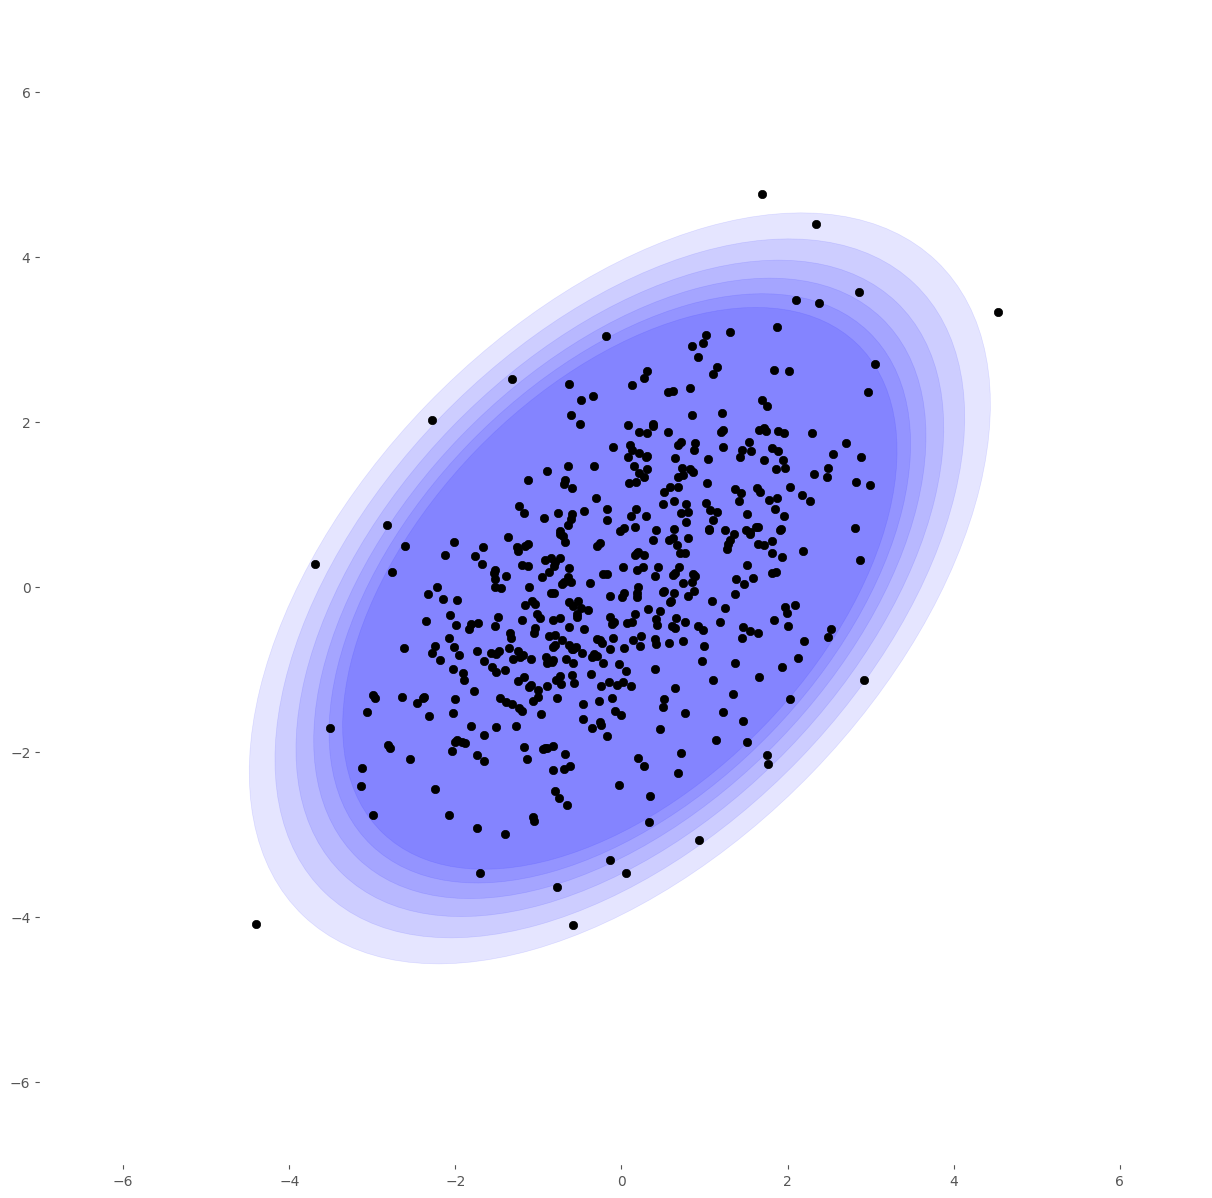

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.axis([-7,7,-7,7])

mu, sigma = computeMaximumLikelihoodEstimators(mvd_normal_sample_df,['x1','x2'])
eigenValues, eigenVectors = diagonalize(sigma)
chiSquaredCriticalVale = chi2.ppf(q=(1-alpha),df=2)

for i in range(0,6):
    confidence=(1-0.96)+i*0.01
    getProbabilityDensityContour(plt,mvd_normal_sample_df,['x1','x2'],confidence,2,color='Blue')
    
scatterPlot(plt,mvd_normal_sample_df,'x1','x2','Black')